#### Load the imports

In [1]:
import io
import keras
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ml_edu.experiment
import ml_edu.results
import numpy as np
import pandas as pd
import plotly.express as px


2025-08-25 05:47:10.736622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756100830.828580    1011 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756100830.857056    1011 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756100831.061532    1011 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756100831.061573    1011 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1756100831.061576    1011 computation_placer.cc:177] computation placer alr

#### Load Dataset

In [2]:
rice_dataset_raw = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/Rice_Cammeo_Osmancik.csv')
rice_dataset_raw.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [3]:
rice_dataset = rice_dataset_raw[[
    'Area',
    'Perimeter',
    'Major_Axis_Length',
    'Minor_Axis_Length',
    'Eccentricity',
    'Convex_Area',
    'Extent',
    'Class',
]]
rice_dataset.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [4]:
print(
    f'The shortest grain is {rice_dataset.Major_Axis_Length.min():.1f}px long,'
    f' while the longest is {rice_dataset.Major_Axis_Length.max():.1f}px.'
)
print(
    f'The smallest rice grain has an area of {rice_dataset.Area.min()}px, while'
    f' the largest has an area of {rice_dataset.Area.max()}px.'
)
print(
    'The largest rice grain, with a perimeter of'
    f' {rice_dataset.Perimeter.max():.1f}px, is'
    f' ~{(rice_dataset.Perimeter.max() - rice_dataset.Perimeter.mean())/rice_dataset.Perimeter.std():.1f} standard'
    f' deviations ({rice_dataset.Perimeter.std():.1f}) from the mean'
    f' ({rice_dataset.Perimeter.mean():.1f}px).'
)
print(
    f'This is calculated as: ({rice_dataset.Perimeter.max():.1f} -'
    f' {rice_dataset.Perimeter.mean():.1f})/{rice_dataset.Perimeter.std():.1f} ='
    f' {(rice_dataset.Perimeter.max() - rice_dataset.Perimeter.mean())/rice_dataset.Perimeter.std():.1f}'
)

The shortest grain is 145.3px long, while the longest is 239.0px.
The smallest rice grain has an area of 7551px, while the largest has an area of 18913px.
The largest rice grain, with a perimeter of 548.4px, is ~2.6 standard deviations (35.6) from the mean (454.2px).
This is calculated as: (548.4 - 454.2)/35.6 = 2.6


#### Explore the dataset
Plot some of the features against each other, including in 3D.

In [5]:
rice_dataset.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

In [6]:
# Create 5 2D plots of the featuers againt each other, color coded by class
for x_axis_data, y_axis_data in [
    ('Area', 'Eccentricity'),
    ('Convex_Area','Perimeter'),
    ('Major_Axis_Length', 'Minor_Axis_Length'),
    ('Perimeter','Extent'),
    ('Eccentricity','Major_Axis_Length')
]:
    px.scatter(rice_dataset, x=x_axis_data, y=y_axis_data, color='Class').show()

#### Task 2: Visualize samples in 3D


In [7]:
rice_dataset.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

In [8]:
x_axis_data, y_axis_data, z_axis_data = 'Minor_Axis_Length', 'Major_Axis_Length', 'Area'
px.scatter_3d(rice_dataset, x=x_axis_data, y=y_axis_data, z=z_axis_data, color='Class', size_max=2).show()

In [9]:
px.scatter_3d(rice_dataset, x='Eccentricity', y='Area', z='Major_Axis_Length', color='Class').show()

#### Normalize data

When creating a model with multiple features, the values of each feature should span roughly the same range.  If one feature's values range from 500 to 100,000 and another feature's values range from 2 to 12, the model will need to have weights of extremely low or extremely high values to be able to combine these features effectively. This could result in a low quality model.  To avoid this,
[normalize](https://developers.google.com/machine-learning/glossary/#normalization) features in a multi-feature model.

This can be done by converting each raw value to its Z-score. The **Z-score** for a given value is how many standard deviations away from the mean the value is.

Consider a feature with a mean of 60 and a standard deviation of 10.

The raw value 75 would have a Z-score of +1.5:

```
  Z-score = (75 - 60) / 10 = +1.5
```

The raw value 38 would have a Z-score of -2.2:

```
  Z-score = (38 - 60) / 10 = -2.2
```

Now normalize the numerical values in the rice dataset by converting them to Z-scores.

In [10]:
# Calculate the Z-Scores of the each numerical column in the raw data and write them into new dataframe named df_normed

feature_mean = rice_dataset.mean(numeric_only=True)
feature_std = rice_dataset.std(numeric_only=True)
numerical_features = rice_dataset.select_dtypes('number').columns
print(f'FEATURE MEAN\n{feature_mean.head()}\n\nFEATURE_STD\n{feature_std.head()}\n\nNUMERIC_FEATURES\n{numerical_features}')

FEATURE MEAN
Area                 12667.727559
Perimeter              454.239180
Major_Axis_Length      188.776222
Minor_Axis_Length       86.313750
Eccentricity             0.886871
dtype: float64

FEATURE_STD
Area                 1732.367706
Perimeter              35.597081
Major_Axis_Length      17.448679
Minor_Axis_Length       5.729817
Eccentricity            0.020818
dtype: float64

NUMERIC_FEATURES
Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent'],
      dtype='object')


In [11]:
normalized_dataset = (rice_dataset[numerical_features] - feature_mean) / feature_std
normalized_dataset.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,1.479635,2.004091,2.348238,-0.212915,2.018073,1.499463,-1.152770
1,1.147720,1.125705,0.988261,0.945444,0.409964,1.192761,-0.602000
2,1.135020,1.317041,1.451718,0.253854,1.212797,1.126356,0.405558
3,0.293398,0.115285,0.261405,0.198025,0.239720,0.233826,-0.275315
4,1.166191,1.486858,1.316269,0.523351,0.952096,1.299685,-0.205986


In [12]:
# Copy the class in the new dataframe.

normalized_dataset['Class'] = rice_dataset['Class']
normalized_dataset.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1.479635,2.004091,2.348238,-0.212915,2.018073,1.499463,-1.152770,Cammeo
1,1.147720,1.125705,0.988261,0.945444,0.409964,1.192761,-0.602000,Cammeo
2,1.135020,1.317041,1.451718,0.253854,1.212797,1.126356,0.405558,Cammeo
3,0.293398,0.115285,0.261405,0.198025,0.239720,0.233826,-0.275315,Cammeo
4,1.166191,1.486858,1.316269,0.523351,0.952096,1.299685,-0.205986,Cammeo


#### Set the Random Seed
To make the experiment reproducible, we set the seed of the random generator. This means that the order on which the data is shuffled, the values of the random weight initialization, etc., will all be the same each time the notebook is run. 

In [13]:
keras.utils.set_random_seed(42)

#### Label and Split Data
To train the model, we will arbritraly assign the Cammeo species a label of `1` and the Osmancik species a label 0f `0` 

In [14]:
# Create the column to set the Cammeo label to '1' and the Osmancik label to '0'
# then show 10 randomly selected rows.

normalized_dataset['Class_Bool'] = (
    # Returns True class is Cammeo and False if Osmancik
    normalized_dataset['Class'] == 'Cammeo'
).astype(int)

normalized_dataset.sample(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class,Class_Bool
1011,-0.130300,0.148771,-0.072634,0.152457,-0.074348,-0.006470,-0.962656,Cammeo,1
3185,-0.149926,-0.483893,-0.517808,0.439081,-0.841936,-0.199495,-0.323746,Osmancik,0
3698,0.115029,-0.144933,-0.405513,0.877395,-1.076499,0.112271,-0.166656,Osmancik,0
897,0.243755,0.525488,0.792344,-0.538162,1.193783,0.213005,1.467607,Cammeo,1
3245,-1.332701,-1.256513,-0.884781,-1.647163,0.451667,-1.374527,-1.143804,Osmancik,0
478,0.183721,0.221136,0.386353,-0.035827,0.524786,0.188806,1.665509,Cammeo,1
1731,-0.427004,-0.763101,-0.787270,0.262378,-1.048551,-0.467929,-0.442065,Osmancik,0
1025,0.550271,0.688647,0.645728,0.304188,0.530083,0.627755,-0.483523,Cammeo,1
429,1.227957,1.215740,1.422856,0.616500,0.978283,1.153368,1.827298,Cammeo,1
1330,-0.419500,-0.045992,0.415723,-1.331021,1.394521,-0.462302,-0.137171,Cammeo,1


We can then randomize and partition the dataset into train, test and validation splits, consisting of 80%, 10% and 10% of dataset respectively

In [15]:
# Create indieces at the 80th and 90th percentiles
number_samples = len(normalized_dataset)
index_80th = round(number_samples * 0.8)
index_90th = index_80th + round(number_samples *0.1)

# Randomize order and split into train, validation and test with a .8, .1 and .1 split
shuffled_data = normalized_dataset.sample(frac=1, random_state=100)
train_data = shuffled_data.iloc[0:index_80th]
validation_data = shuffled_data.iloc[index_80th:index_90th]
test_data = shuffled_data.iloc[index_90th:]

# Show the first 5 row of last split
test_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class,Class_Bool
2405,-0.438549,-0.661183,-0.825462,0.313231,-1.149000,-0.444856,0.341663,Osmancik,0
3062,-0.197838,-0.005342,0.224592,-0.656363,0.802824,-0.207936,1.606695,Osmancik,0
1155,1.381504,1.211330,1.081698,1.176669,0.340787,1.336264,0.710095,Cammeo,1
660,1.165037,1.016005,0.817115,1.311436,-0.002803,1.188822,-0.611756,Cammeo,1
2451,-1.154909,-1.193698,-1.423946,-0.278183,-1.477920,-1.106093,0.053997,Osmancik,0


It is important to prevent the model from getting the label as input during training, which is called label leakage. This can be dine by storing label and features as seperate variable

In [48]:
label_columns = ['Class', 'Class_Bool']
train_features = train_data.drop(columns=label_columns)
train_labels = train_data[label_columns[1]].to_numpy()
validation_features = validation_data.drop(columns=label_columns)
validation_labels = validation_data[label_columns[1]].to_numpy()
test_features = train_data.drop(columns=label_columns)
test_labels = train_data[label_columns[1]].to_numpy()

#### Train the model
Choose the input features
To start with we will train the model on `Eccentricity`, `Major_Axis_Length` and `Area` 

In [17]:
# Name of the features we'll train our model on.
input_features = [
    'Eccentricity',
    'Major_Axis_Length',
    'Area',
]

#### Define function that build and train model
- `creare_model(inputs, learning_rate, metrics)`, which defines model architecture
- `train_model(model, daataset, epochs, label_name, batch_size, shuffel)`, uses input features and labels to train the model.

Note: `create_model` applies sigmoid function to perform logistic regression

In [18]:
def creat_model(
        settings: ml_edu.experiment.ExperimentSettings,
        metrics: list[keras.metrics.Metric],
) -> keras.Model:
    """Create and comple simple classification model"""
    model_inputs = [keras.Input(shape=(1,), name=feature) for feature in settings.input_features]
    # Use the Concanate layer to assemble different inputs in single tensor which will be given as input to dence layer.
    # For example: [input_1[0][0], input_2[0][0]]

    concatenated_inputs = keras.layers.Concatenate()(model_inputs)
    model_output = keras.layers.Dense(units=1, name='dence_layer', activation=keras.activations.sigmoid)(concatenated_inputs)
    model = keras.Model(inputs = model_inputs, outputs = model_output)

    # Call the compile method to transform the layers into model that keras can execute.
    # Notice that we are using different loss function for classification than for regression.

    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=metrics)
    
    dense_layer  = model.get_layer('dence_layer')
    
    weights, bias = dense_layer.get_weights()
    print("Weights shape:", weights.shape)
    print("Weights values:\n", weights)
    print("Bias shape:", bias.shape)
    print("Bias values:\n", bias)
    
    return model

def train_model(
        experiment_name:str,
        model: keras.Model,
        dataset: pd.DataFrame,
        labels: np.ndarray,
        settings: ml_edu.experiment.ExperimentSettings
) ->ml_edu.experiment.Experiment:
    
    """Feed a dataset into the model in orrder to train it"""

    # The x perameter of the keras.Model can be a list of arrays, 
    # where each array contains the data for one feature
    features = {feature_name: np.array(dataset[feature_name]) for feature_name in settings.input_features}
    
    history = model.fit(x=features, y=labels, epochs=settings.number_epochs, batch_size=settings.batch_size)

    return ml_edu.experiment.Experiment(
        name=experiment_name, 
        settings=settings, 
        model=model, 
        epochs=history.epoch, 
        metrics_history=pd.DataFrame(history.history))

print('Defined the creat_model and train_model function')

Defined the creat_model and train_model function


#### Define a ploating function
The matplotlib function plots one or more curves, showing how various classification changewith each epoch


#### Invoke the `creating`, `training` and `ploting` function
Classification threshold is set to 0-35. Try playing with threshhold and then with learning rate to see what changes

In [61]:
# Lets define our first experiment settings.
settings = ml_edu.experiment.ExperimentSettings(
    learning_rate=0.001,
    number_epochs=160,
    batch_size=100,
    input_features=input_features,
    classification_threshold=0.7
)

metrix = [
    keras.metrics.BinaryAccuracy(name='accuracy', threshold=settings.classification_threshold),
    keras.metrics.Precision(name='precision', thresholds=settings.classification_threshold),
    keras.metrics.Recall(name='recall', thresholds=settings.classification_threshold),
    keras.metrics.AUC(name='auc', num_thresholds=100)
]

# Establish the model's torography
model = creat_model(settings, metrix)

Weights shape: (3, 1)
Weights values:
 [[ 0.9770216 ]
 [-0.25639874]
 [ 1.0759379 ]]
Bias shape: (1,)
Bias values:
 [0.]


Epoch 1/160
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8826 - auc: 0.9758 - loss: 0.3323 - precision: 0.9661 - recall: 0.7600   
Epoch 2/160
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8877 - auc: 0.9759 - loss: 0.3195 - precision: 0.9655 - recall: 0.7725 
Epoch 3/160
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8877 - auc: 0.9760 - loss: 0.3091 - precision: 0.9641 - recall: 0.7735 
Epoch 4/160
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8889 - auc: 0.9761 - loss: 0.2994 - precision: 0.9586 - recall: 0.7812 
Epoch 5/160
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8935 - auc: 0.9761 - loss: 0.2905 - precision: 0.9592 - recall: 0.7917 
Epoch 6/160
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8938 - auc: 0.9762 - loss: 0.2823 - precision: 0.9578 - recall: 0.7936 
Epoch 7/160
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8932 - auc: 0.9763 - loss: 0.2747 - precision: 0.9534 - recall: 0.7962 
Epoch 8/160
31/31 ━━━━━━━━━━━━━━━━━━━━ 

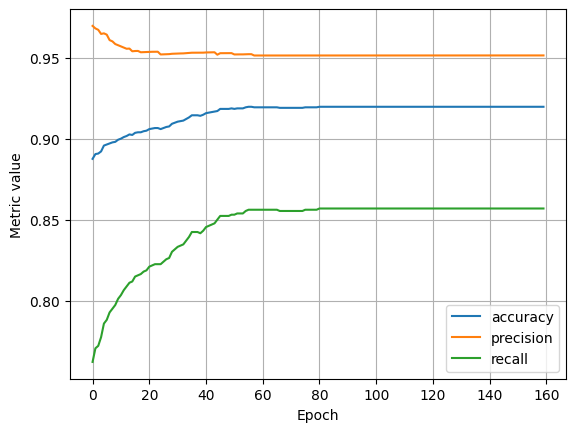

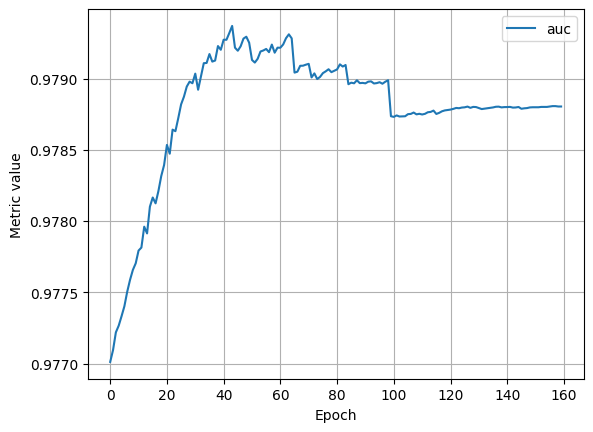

In [62]:
# Train the model on training set
experiment = train_model(experiment_name='baseline', model=model, dataset=train_features, labels=train_labels, settings=settings)

# Plot metrics vs epochs
ml_edu.results.plot_experiment_metrics(experiment=experiment, metrics=['accuracy', 'precision', 'recall'])
ml_edu.results.plot_experiment_metrics(experiment=experiment, metrics=['auc'])

#### Evaluate the model againdt validation set
At the end of model training, you ended up with a certain accuracy against the training set. Invoke the following code cell to determine your model's accuracy against the validation set.

In [63]:
def compare_train_validation(experiment:ml_edu.experiment.Experiment, validation_metrics: dict[str, float]):
    print('Comparing metrics between train and validation')

    for metric, validation_value in validation_metrics.items():
        print('--------')
        print(f'Train {metric}: {experiment.get_final_metric_value(metric):.4f}')
        print(f'Validation {metric}: {validation_value:.4f}')

# Evaluate validation metrics
validation_metrics = experiment.evaluate(validation_features, validation_labels)
compare_train_validation(experiment, validation_metrics)

Comparing metrics between train and validation
--------
Train accuracy: 0.9199
Validation accuracy: 0.8924
--------
Train auc: 0.9788
Validation auc: 0.9711
--------
Train loss: 0.1806
Validation loss: 0.2167
--------
Train precision: 0.9517
Validation precision: 0.9324
--------
Train recall: 0.8571
Validation recall: 0.8166


It appears that the model, which achieved ~92% accuracy on the training data, still shows an accuracy of about 90% on the validation data. Can we do better? Let's train a model using all seven available features and compare the AUC.

In [35]:
train_features.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
2030,-2.076769,-2.223362,-1.821991,-2.109025,-0.274986,-2.093166,0.977027
2225,-0.582860,-0.308402,-0.513622,-0.425379,-0.111876,-0.522516,-0.891168
1053,0.694583,1.189419,1.363689,-0.443210,1.546616,0.783075,-1.736411
3685,-0.188602,-0.087737,-0.294041,0.066788,-0.255445,-0.155600,-0.774437
2976,-0.657324,-0.949044,-1.175949,0.379025,-1.744676,-0.677837,0.623452


In [37]:
all_input_features = [
  'Eccentricity',
  'Major_Axis_Length',
  'Minor_Axis_Length',
  'Area',
  'Perimeter',
  'Convex_Area',
  'Extent'  
]

In [ ]:
settings_all_features = ml_edu.experiment.ExperimentSettings(
    learning_rate=0.001,
    number_epochs=60,
    batch_size=100,
    input_features=all_input_features,
    classification_threshold=0.5
)

metrics = [
    keras.metrics.BinaryAccuracy(name='accuracy', threshold=settings_all_features.classification_threshold),
    keras.metrics.Precision(name='precition', thresholds=settings_all_features.classification_threshold),
    keras.metrics.Recall(name='recall', thresholds=settings_all_features.classification_threshold),
    keras.metrics.AUC(name='auc', num_thresholds=100)
]

# Establish Model Topography
model_all_features = creat_model(settings, metrics)

Weights shape: (3, 1)
Weights values:
 [[ 1.1736876]
 [-0.044047 ]
 [ 0.6518041]]
Bias shape: (1,)
Bias values:
 [0.]


Epoch 1/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8811 - auc: 0.9595 - loss: 0.3566 - precition: 0.8135 - recall: 0.9465
Epoch 2/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8862 - auc: 0.9612 - loss: 0.3433 - precition: 0.8216 - recall: 0.9465
Epoch 3/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8909 - auc: 0.9626 - loss: 0.3324 - precition: 0.8318 - recall: 0.9425
Epoch 4/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8918 - auc: 0.9639 - loss: 0.3222 - precition: 0.8350 - recall: 0.9395
Epoch 5/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8940 - auc: 0.9651 - loss: 0.3128 - precition: 0.8393 - recall: 0.9387
Epoch 6/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8955 - auc: 0.9661 - loss: 0.3040 - precition: 0.8437 - recall: 0.9356
Epoch 7/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8982 - auc: 0.9673 - loss: 0.2958 - precition: 0.8509 - recall: 0.9314
Epoch 8/60
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc

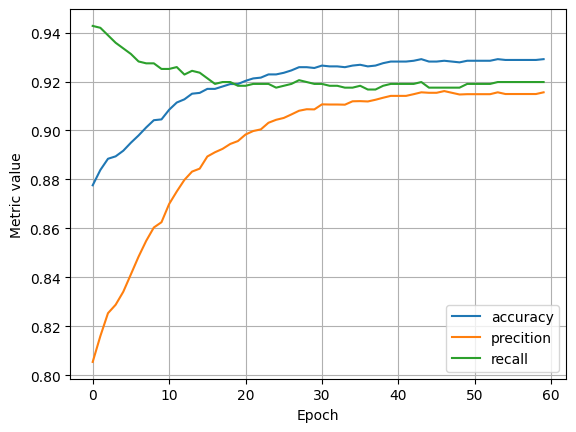

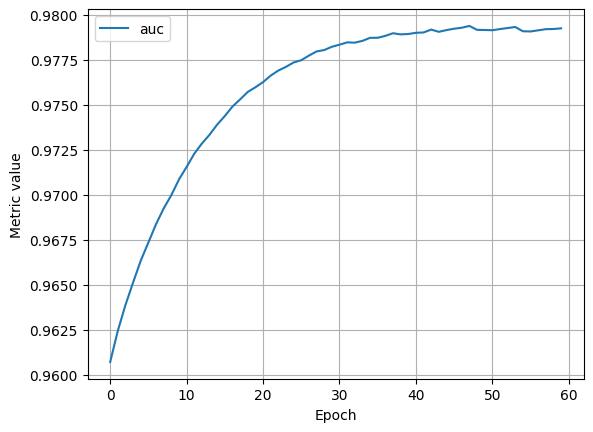

In [40]:
# Train the model on training set
experiment_all_features = train_model(
    experiment_name='all features', 
    model=model_all_features, 
    dataset=train_features, 
    labels=train_labels, 
    settings=settings_all_features)

# Plot metrics vs epoches
ml_edu.results.plot_experiment_metrics(experiment_all_features, ['accuracy','precition','recall'])
ml_edu.results.plot_experiment_metrics(experiment_all_features, ['auc'] )

In [41]:
validation_metrics_all_features = experiment_all_features.evaluate(validation_features, validation_labels)
compare_train_validation(experiment_all_features, validation_metrics_all_features)

Comparing metrics between train and validation
--------
Train accuracy: 0.9291
Validation accuracy: 0.9134
--------
Train auc: 0.9792
Validation auc: 0.9718
--------
Train loss: 0.1816
Validation loss: 0.2152
--------
Train precition: 0.9156
Validation precition: 0.8953
--------
Train recall: 0.9198
Validation recall: 0.9112


This second model has closer train and validation metrics, suggesting it overfit less to the training data.

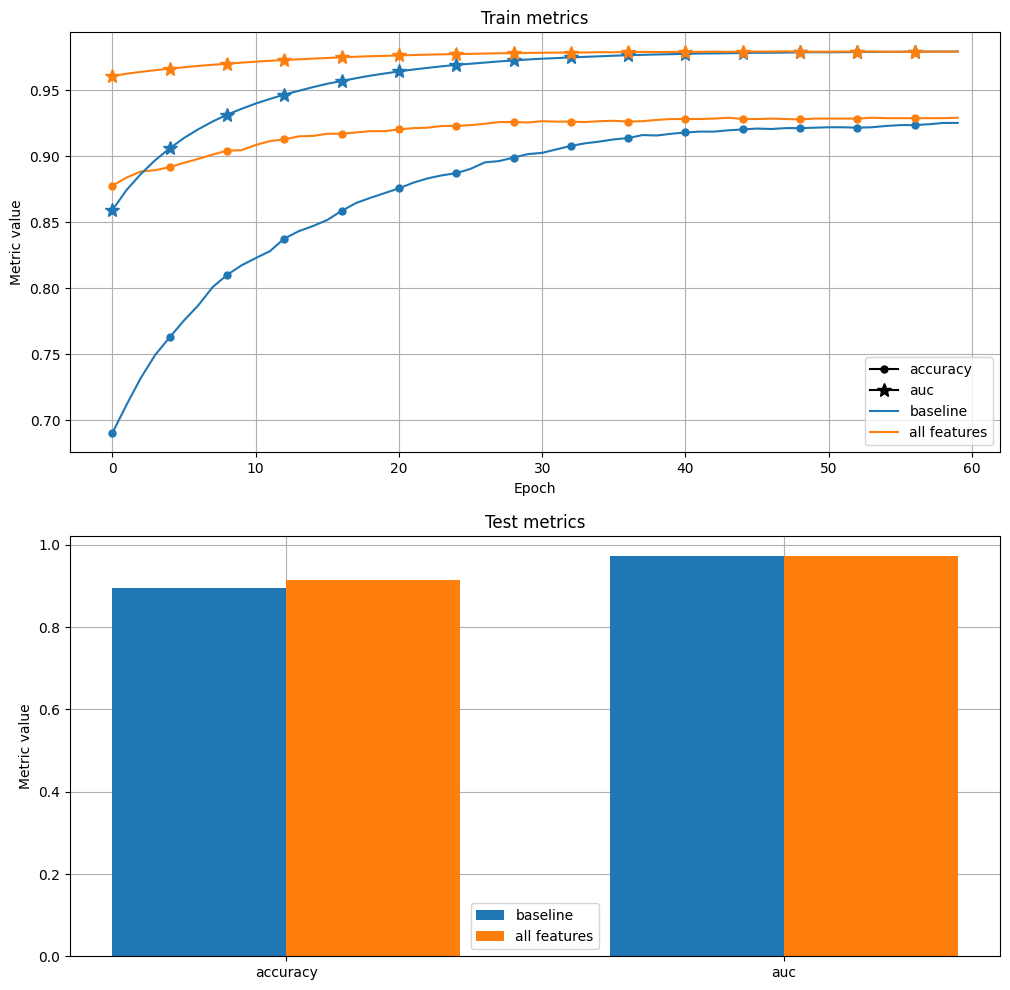

In [42]:
ml_edu.results.compare_experiment([experiment, experiment_all_features],
                                  ['accuracy', 'auc'],
                                  validation_features, validation_labels)

# Computing the final test metrics

To estimate the peformance of our model on unseen data, we can now compute the metrics of the best model on the test data. This final step must be done once experimentation is over and we have selected the model we want to use. Any model comparison must be done using the validation set, to avoid accidentally selecting a model which is tailored for our test set. 

This final step is also the opportunity to check for potential overfitting: if the validation and test metrics are very different, it might be a sign that the selection process done using the validation set led to a model that doesn't generalize well, possibly because the validation set is not representative of the overall data distribution. In that case, the best solution is to shuffle the data and re-assign the train, validation, and test sets, before running your experiments again.

In [49]:
test_metrics_all_features = experiment_all_features.evaluate(test_features, test_labels)
for metric, test_value in test_metrics_all_features.items():
    print(f'Test {metric}: {test_value}')

Test accuracy: 0.9294619560241699
Test auc: 0.9792537689208984
Test loss: 0.18150578439235687
Test precition: 0.9162861704826355
Test recall: 0.9197860956192017


In this case, we see that the test accuracy is about 92%, which is close to the validation accuracy we obtained above. This means that our model should perform equally well on new, unseen data!